# cassfication

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import genfromtxt, zeros
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,plot_roc_curve,auc,roc_curve

In [2]:
iris_data = pd.read_csv('iris.csv')

In [3]:
data=pd.DataFrame({
    'sepal length':iris_data.iloc[:,0],
    'sepal width':iris_data.iloc[:,1],
    'petal length':iris_data.iloc[:,2],
    'petal width':iris_data.iloc[:,3],
    'species':iris_data.iloc[:,4],
})

In [4]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa


In [5]:
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  

t = zeros(len(y))
t[y == 'setosa'] = 1
t[y == 'versicolor'] = 2
t[y == 'virginica'] = 3

X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=0.5) # 50% training and 50% test

In [39]:
def calculate_roc_values(fpr,tpr,roc_auc,prob):
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test, prob[:, i],pos_label=i+1)
        roc_auc[i] = auc(fpr[i], tpr[i])
        
def plot_roc(prob,title):
    dic_fpr = dict()
    dic_tpr = dict()
    dic_roc_auc = dict()
    colors = ['green', 'yellow', 'red']
    labels = ['setosa', 'versicolor','virginica']
    calculate_roc_values(dic_fpr,dic_tpr,dic_roc_auc,prob)
    
    plt.style.use('seaborn')
    for i in range(3):
        plt.plot(dic_fpr[i], dic_tpr[i], linestyle='--',color=colors[i], label=labels[i])
    

    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.title('{} ROC'.format(title))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show();
                                                             

# Random Forest

##### prediction

In [7]:
rf_clf=RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)
rf_y_prediction=rf_clf.predict(X_test)
print("Random Forest Prediction")
print(rf_y_prediction)

Random Forest Prediction
[3. 3. 2. 3. 1. 1. 3. 3. 3. 3. 2. 1. 3. 1. 2. 1. 3. 1. 2. 3. 1. 1. 2. 3.
 2. 3. 1. 2. 3. 2. 2. 3. 3. 2. 1. 1. 1. 3. 1. 1. 3. 2. 1. 3. 2. 1. 3. 3.
 3. 2. 1. 1. 3. 3. 2. 1. 2. 3. 2. 2. 3. 2. 3. 1. 2. 1. 3. 1. 2. 2. 3. 1.
 1. 3. 2.]


In [8]:
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, rf_y_prediction))

Random Forest Accuracy: 0.9466666666666667


In [9]:
print(rf_clf.predict([[3, 5, 4, 2]]))

[3.]


##### clasfication report

In [10]:
print(classification_report(y_test,rf_y_prediction))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        24
         2.0       1.00      0.85      0.92        26
         3.0       0.86      1.00      0.93        25

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



##### confusion matrix

In [11]:
print(confusion_matrix(y_test,rf_y_prediction))

[[24  0  0]
 [ 0 22  4]
 [ 0  0 25]]


##### AUC

In [12]:
rf_prob = rf_clf.predict_proba(X_test)

rf_auc_score = roc_auc_score(y_test, rf_prob,multi_class='ovr')
print('AUC =',rf_auc_score)

AUC = 0.9931470434327577


##### ROC Curve

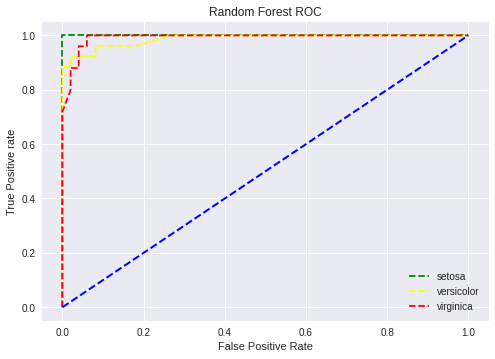

In [40]:
plot_roc(rf_prob,'Random Forest')                                                          

## Decision Tree Model

##### prediction

In [41]:
dt_classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_classifier.fit(X_train,y_train)
dt_y_prediction= dt_classifier.predict(X_test)
print("Decision Tree Prediction =",dt_y_prediction)

Decision Tree Prediction = [3. 3. 2. 3. 1. 1. 3. 3. 3. 3. 2. 1. 3. 1. 2. 1. 3. 1. 2. 2. 1. 1. 2. 3.
 2. 3. 1. 2. 3. 2. 2. 3. 3. 2. 1. 1. 1. 3. 1. 1. 3. 2. 1. 3. 2. 1. 3. 3.
 3. 2. 1. 1. 3. 3. 2. 1. 2. 3. 2. 2. 3. 2. 3. 1. 2. 1. 3. 1. 2. 2. 3. 1.
 1. 3. 2.]


In [42]:
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, dt_y_prediction))

Decision Tree Accuracy: 0.96


In [43]:
print(dt_classifier.predict([[3, 5, 4, 2]]))

[3.]


##### clasfication report

In [44]:
print(classification_report(y_test,dt_y_prediction))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        24
         2.0       1.00      0.88      0.94        26
         3.0       0.89      1.00      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



##### confusion matrix

In [45]:
print(confusion_matrix(y_test,dt_y_prediction))

[[24  0  0]
 [ 0 23  3]
 [ 0  0 25]]


##### AUC

In [46]:
dt_prob = dt_classifier.predict_proba(X_test)

dt_auc_score = roc_auc_score(y_test, dt_prob,multi_class='ovr')
print('AUC =',dt_auc_score)

AUC = 0.9707692307692307


##### ROC Curve

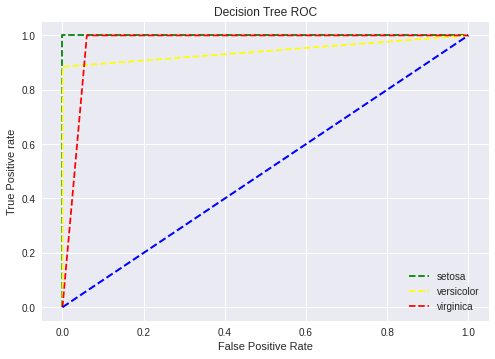

In [47]:
plot_roc(dt_prob,'Decision Tree')                                                          

# KNN

##### prediction

In [48]:
knn_classifier = KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2)
knn_classifier.fit(X_train,y_train)
knn_y_prediction = knn_classifier.predict(X_test)
print("KNN Prediction =",knn_y_prediction)

KNN Prediction = [3. 3. 2. 3. 1. 1. 3. 3. 3. 3. 2. 1. 3. 1. 2. 1. 3. 1. 2. 2. 1. 1. 2. 3.
 2. 3. 1. 2. 3. 2. 2. 3. 3. 2. 1. 1. 1. 2. 1. 1. 3. 2. 1. 3. 2. 1. 3. 3.
 3. 2. 1. 1. 3. 3. 2. 1. 2. 3. 2. 2. 3. 2. 3. 1. 2. 1. 3. 1. 2. 2. 3. 1.
 1. 3. 2.]


In [49]:
print("KNN Accuracy:",metrics.accuracy_score(y_test, knn_y_prediction))

KNN Accuracy: 0.9733333333333334


In [50]:
print(knn_classifier.predict([[3, 5, 4, 2]]))

[2.]


##### clasfication report

In [51]:
print(classification_report(y_test,knn_y_prediction))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        24
         2.0       1.00      0.92      0.96        26
         3.0       0.93      1.00      0.96        25

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



##### confusion matrix

In [52]:
print(confusion_matrix(y_test,knn_y_prediction))

[[24  0  0]
 [ 0 24  2]
 [ 0  0 25]]


##### AUC

In [53]:
knn_prob = knn_classifier.predict_proba(X_test)

knn_auc_score = roc_auc_score(y_test, knn_prob,multi_class='ovr')
print('AUC =',knn_auc_score)

AUC = 0.989992255363684


##### ROC Curve

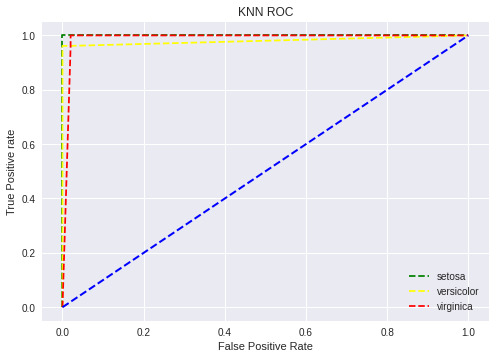

In [54]:
plot_roc(knn_prob,'KNN')                                                          

# Logistic Regression

##### prediction

In [55]:
lr_classifier=LogisticRegression(multi_class='ovr')
lr_classifier.fit(X_train,y_train)
lr_y_prediction = lr_classifier.predict(X_test)
print("Logistic Regression =",lr_y_prediction)

Logistic Regression = [3. 3. 2. 3. 1. 1. 3. 3. 3. 3. 2. 1. 3. 1. 2. 1. 3. 1. 2. 2. 1. 1. 2. 3.
 2. 3. 1. 3. 3. 2. 2. 3. 3. 2. 1. 1. 1. 3. 1. 1. 3. 3. 1. 3. 2. 1. 3. 3.
 3. 2. 1. 1. 3. 3. 2. 1. 2. 3. 2. 3. 3. 2. 3. 1. 2. 1. 3. 1. 2. 2. 3. 1.
 1. 3. 2.]


In [56]:
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, lr_y_prediction))

Logistic Regression Accuracy: 0.92


In [57]:
print(lr_classifier.predict([[3, 5, 4, 2]]))

[3.]


##### clasfication report

In [58]:
print(classification_report(y_test,lr_y_prediction))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        24
         2.0       1.00      0.77      0.87        26
         3.0       0.81      1.00      0.89        25

    accuracy                           0.92        75
   macro avg       0.94      0.92      0.92        75
weighted avg       0.94      0.92      0.92        75



##### confusion matrix

In [59]:
print(confusion_matrix(y_test,lr_y_prediction))

[[24  0  0]
 [ 0 20  6]
 [ 0  0 25]]


##### AUC

In [60]:
lr_prob = lr_classifier.predict_proba(X_test)
lr_auc_score = roc_auc_score(y_test, lr_prob,multi_class='ovr')
print('AUC =',lr_auc_score)

AUC = 0.9902287807430664


##### ROC Curve

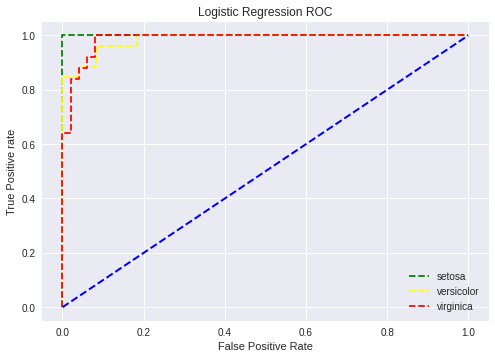

In [61]:
plot_roc(lr_prob,'Logistic Regression')     

# Linear Discriminant Analysis

##### prediction

In [62]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train,y_train)
lda_y_prediction = lda_classifier.predict(X_test)
print("Linear Discriminant Analysis =",lr_y_prediction)

Linear Discriminant Analysis = [3. 3. 2. 3. 1. 1. 3. 3. 3. 3. 2. 1. 3. 1. 2. 1. 3. 1. 2. 2. 1. 1. 2. 3.
 2. 3. 1. 3. 3. 2. 2. 3. 3. 2. 1. 1. 1. 3. 1. 1. 3. 3. 1. 3. 2. 1. 3. 3.
 3. 2. 1. 1. 3. 3. 2. 1. 2. 3. 2. 3. 3. 2. 3. 1. 2. 1. 3. 1. 2. 2. 3. 1.
 1. 3. 2.]


In [63]:
print("Linear Discriminant Analysis Accuracy:",metrics.accuracy_score(y_test, lda_y_prediction))

Linear Discriminant Analysis Accuracy: 0.9733333333333334


In [64]:
print(lda_classifier.predict([[3, 5, 4, 2]]))

[3.]


##### clasfication report

In [65]:
print(classification_report(y_test,lda_y_prediction))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        24
         2.0       1.00      0.92      0.96        26
         3.0       0.93      1.00      0.96        25

    accuracy                           0.97        75
   macro avg       0.98      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



##### confusion matrix

In [66]:
print(confusion_matrix(y_test,lda_y_prediction))

[[24  0  0]
 [ 0 24  2]
 [ 0  0 25]]


##### AUC

In [67]:
lda_prob = lda_classifier.predict_proba(X_test)
lda_auc_score = roc_auc_score(y_test, lda_prob,multi_class='ovr')
print('AUC =',lda_auc_score)

AUC = 0.9978867608581895


##### ROC Curve

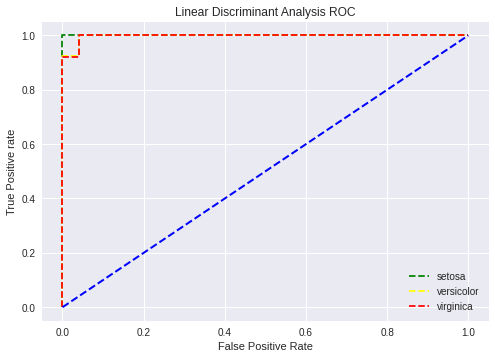

In [68]:
plot_roc(lda_prob,'Linear Discriminant Analysis')     

# Quadratic Discriminant Analysis

##### prediction

In [69]:
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train,y_train)
qda_y_prediction = qda_classifier.predict(X_test)
print("Quadratic Discriminant Analysis =",qda_y_prediction)

Quadratic Discriminant Analysis = [3. 3. 2. 3. 1. 1. 3. 3. 3. 3. 3. 1. 3. 1. 2. 1. 3. 1. 2. 3. 1. 1. 2. 3.
 2. 3. 1. 2. 3. 2. 2. 3. 3. 2. 1. 1. 1. 2. 1. 1. 3. 2. 1. 3. 2. 1. 3. 3.
 3. 2. 1. 1. 3. 3. 2. 1. 2. 3. 2. 2. 3. 2. 3. 1. 2. 1. 3. 1. 2. 2. 3. 1.
 1. 3. 2.]


In [70]:
print("Quadratic Discriminant Analysis Accuracy:",metrics.accuracy_score(y_test, qda_y_prediction))

Quadratic Discriminant Analysis Accuracy: 0.9466666666666667


In [71]:
print(qda_classifier.predict([[3, 5, 4, 2]]))

[3.]


##### clasfication report

In [72]:
print(classification_report(y_test,qda_y_prediction))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        24
         2.0       1.00      0.85      0.92        26
         3.0       0.86      1.00      0.93        25

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



##### confusion matrix

In [73]:
print(confusion_matrix(y_test,qda_y_prediction))

[[24  0  0]
 [ 0 22  4]
 [ 0  0 25]]


##### AUC

In [74]:
qda_prob = qda_classifier.predict_proba(X_test)
qda_auc_score = roc_auc_score(y_test, qda_prob,multi_class='ovr')
print('AUC =',qda_auc_score)

AUC = 0.9989433804290947


##### ROC Curve

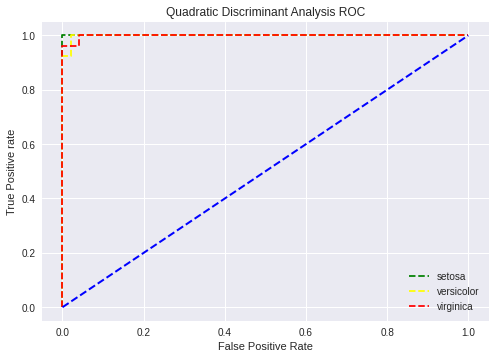

In [75]:
plot_roc(qda_prob,'Quadratic Discriminant Analysis')     

# Boosting Algorithm 

##### prediction

In [76]:
boost_classifier = AdaBoostClassifier(n_estimators=50, random_state=0)
boost_classifier.fit(X_train,y_train)
boost_y_prediction = boost_classifier.predict(X_test)
print("Boosting Algorithm =",boost_y_prediction)

Boosting Algorithm = [3. 3. 2. 3. 1. 1. 3. 3. 3. 3. 2. 1. 3. 1. 2. 1. 3. 1. 2. 2. 1. 1. 2. 3.
 2. 3. 1. 2. 3. 2. 2. 3. 3. 2. 1. 1. 1. 3. 1. 1. 3. 2. 1. 3. 2. 1. 3. 3.
 3. 2. 1. 1. 3. 3. 2. 1. 2. 3. 2. 2. 3. 2. 3. 1. 2. 1. 3. 1. 2. 2. 3. 1.
 1. 3. 2.]


In [77]:
print("Boosting Algorithm Accuracy :",metrics.accuracy_score(y_test, boost_y_prediction))

Boosting Algorithm Accuracy : 0.96


In [236]:
print(boost_classifier.predict([[3, 5, 4, 2]]))

[3.]


##### clasfication report

In [78]:
print(classification_report(y_test,boost_y_prediction))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        24
         2.0       1.00      0.88      0.94        26
         3.0       0.89      1.00      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



##### confusion matrix

In [79]:
print(confusion_matrix(y_test,boost_y_prediction))

[[24  0  0]
 [ 0 23  3]
 [ 0  0 25]]


##### AUC

In [80]:
boost_prob = boost_classifier.predict_proba(X_test)
boost_auc_score = roc_auc_score(y_test, boost_prob,multi_class='ovr')
print('AUC =',boost_auc_score)

AUC = 0.985003453689168


##### ROC Curve

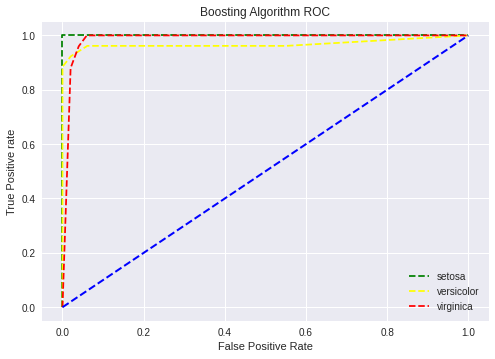

In [81]:
plot_roc(boost_prob,'Boosting Algorithm')     

# Best Classifier

In [82]:
print("Accuracy")
print("-------------------")
print("RF                  =",metrics.accuracy_score(y_test, rf_y_prediction))
print("DT                  =",metrics.accuracy_score(y_test, dt_y_prediction))
print("KNN                 =",metrics.accuracy_score(y_test, knn_y_prediction))
print("LR                  =",metrics.accuracy_score(y_test, lr_y_prediction))
print("LDA                 =",metrics.accuracy_score(y_test, lda_y_prediction))
print("BA                  =",metrics.accuracy_score(y_test, boost_y_prediction))
print("QDA                 =",metrics.accuracy_score(y_test, qda_y_prediction))
print("\n")
print("AUC")
print("-------------------")
print('RF                  =',rf_auc_score)
print('DT                  =',dt_auc_score)
print('KNN                 =',knn_auc_score)
print('LR                  =',lr_auc_score)
print('LDA                 =',lda_auc_score)
print('QDA                 =',qda_auc_score)
print('BA                  =',boost_auc_score)


Accuracy
-------------------
RF                  = 0.9466666666666667
DT                  = 0.96
KNN                 = 0.9733333333333334
LR                  = 0.92
LDA                 = 0.9733333333333334
BA                  = 0.96
QDA                 = 0.9466666666666667


AUC
-------------------
RF                  = 0.9931470434327577
DT                  = 0.9707692307692307
KNN                 = 0.989992255363684
LR                  = 0.9902287807430664
LDA                 = 0.9978867608581895
QDA                 = 0.9989433804290947
BA                  = 0.985003453689168


# I will choose Linear Discriminant Analysis Model as a final model as it has highest accuracy(97.3 %) and auc(99.7%)